**Table of Contents**  
[Data loading](#data_loading)  
[Visualization](#visualization)  
&nbsp; &nbsp; &nbsp; &nbsp;[n_neighbors](#n_neighbors)  
&nbsp; &nbsp; &nbsp; &nbsp;[min_dist](#min_dist)  
&nbsp; &nbsp; &nbsp; &nbsp;[metric](#metric)  
[Clustering](#clustering)  


In [1]:
!date +%F

2019-04-24


In [2]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.sparse
import sklearn.manifold

In [3]:
print(sys.version)
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scipy version:', scipy.__version__)
print('sklearn version:', sklearn.__version__)

3.7.3 (default, Apr 19 2019, 19:12:31) 
[Clang 10.0.1 (clang-1001.0.46.4)]
numpy version: 1.16.2
pandas version: 0.24.2
scipy version: 1.2.1
sklearn version: 0.20.3


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print('matplotlib version:', mpl.__version__)
print('seaborn version:', sns.__version__)

matplotlib version: 3.0.3
seaborn version: 0.9.0


In [6]:
# set pdf.fonttype to 42 (TrueType), editable texts in Illustrator
mpl.rcParams['pdf.fonttype'] = 42
# set fonts
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
# mpl.rcParams['figure.dpi'] = mpl.rcParams['figure.dpi'] * 1.5

In [7]:
import umap
print('umap version:', umap.__version__)

umap version: 0.3.8


<a id='data_loading'></a>

# Data loading

In [8]:
# load cells
cells_included = np.load('../../data/drop-seq/expr_readcount_norm_log_corrected_scaled_dimnames.npy',
                         allow_pickle=True)[1]
cells_included

array(['JD126-1-2_TTTCTATATACA.bam', 'JD126-1-2_CCTAGAAACCAG.bam',
       'JD126-1-2_TCATAGTCTATT.bam', ..., 'JD135Y_CCGATATGGTCT.bam',
       'JD135Y_ATGTGAGGATTG.bam', 'JD135Y_ATGCCCCGCGTC.bam'], dtype='<U26')

In [9]:
# load clustering
tsne_out_coords = pd.read_csv('../../data/drop-seq/tsne_out_coords.txt', index_col=0)

In [10]:
# load PCA result
%time mat = np.load('../../data/drop-seq/pca_out_x.npy')[:,0:10]
mat.shape

CPU times: user 1.32 ms, sys: 2.43 s, total: 2.43 s
Wall time: 3.1 s


(25776, 10)

<a id='visualization'></a>

# Visualization

In [11]:
embedding_umap = tsne_out_coords[['cluster' ,'num.umis', 'num.reads']].copy(deep=True)
embedding_umap.shape

(25776, 3)

In [12]:
sns.set()

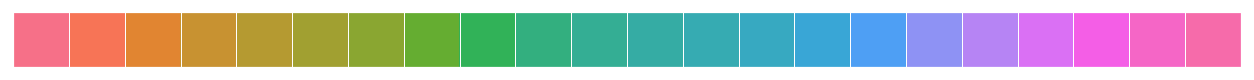

In [13]:
cluster_colors = sns.color_palette("husl", embedding_umap['cluster'].unique().shape[0])
sns.palplot(cluster_colors)

In [14]:
cluster_colors_dict = {i + 1:j for i, j in enumerate(cluster_colors)}
embedding_umap['color'] = embedding_umap['cluster'].map(cluster_colors_dict)
embedding_umap.head()

cluster  num.umis  num.reads  \
JD126-1-2_TTTCTATATACA.bam        9     18437      23692   
JD126-1-2_CCTAGAAACCAG.bam        9     16103      20274   
JD126-1-2_TCATAGTCTATT.bam        9     15542      20525   
JD126-1-2_ATGACCTTTCCC.bam       13     14783      17798   
JD126-1-2_CATTAGTGATGG.bam       11     13701      16388   

                                                                        color  
JD126-1-2_TTTCTATATACA.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_CCTAGAAACCAG.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_TCATAGTCTATT.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_ATGACCTTTCCC.bam  (0.21420912437215422, 0.6714963557258681, 0.69...  
JD126-1-2_CATTAGTGATGG.bam  (0.2067117296964458, 0.6829103404254792, 0.582...

<a id='n_neighbors'></a>

## n_neighbors

In [15]:
embedding_umap_n_neighbors = embedding_umap.copy(deep=True)

In [16]:
num_neighbors = [3, 4, 5, 10, 15, 20, 30, 50, 100, 500]

In [17]:
for i in num_neighbors:
    print('Calculating n_neighbors: {} ... '.format(i),
          end='')
    
    np.random.seed(seed=20190212)
    u = umap.UMAP(n_neighbors=i,
                  min_dist=0.1,
                  n_components=2,
                  metric='euclidean').fit_transform(mat)
    print('Done!')
    
    embedding_umap_n_neighbors.loc[:, 'n_neighbors_' + str(i) + '_x'] = u[:,0]
    embedding_umap_n_neighbors.loc[:, 'n_neighbors_' + str(i) + '_y'] = u[:,1]

Calculating n_neighbors: 3 ... 

/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 19 separate connected components using meta-embedding (experimental)
  n_components
/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Done!
Calculating n_neighbors: 4 ... 

/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


Done!
Calculating n_neighbors: 5 ... Done!
Calculating n_neighbors: 10 ... Done!
Calculating n_neighbors: 15 ... Done!
Calculating n_neighbors: 20 ... Done!
Calculating n_neighbors: 30 ... Done!
Calculating n_neighbors: 50 ... Done!
Calculating n_neighbors: 100 ... Done!
Calculating n_neighbors: 500 ... Done!


In [18]:
embedding_umap_n_neighbors.shape

(25776, 24)

In [19]:
if not Path('embedding_umap_n_neighbors.csv').is_file():
    embedding_umap_n_neighbors.to_csv('embedding_umap_n_neighbors.csv')

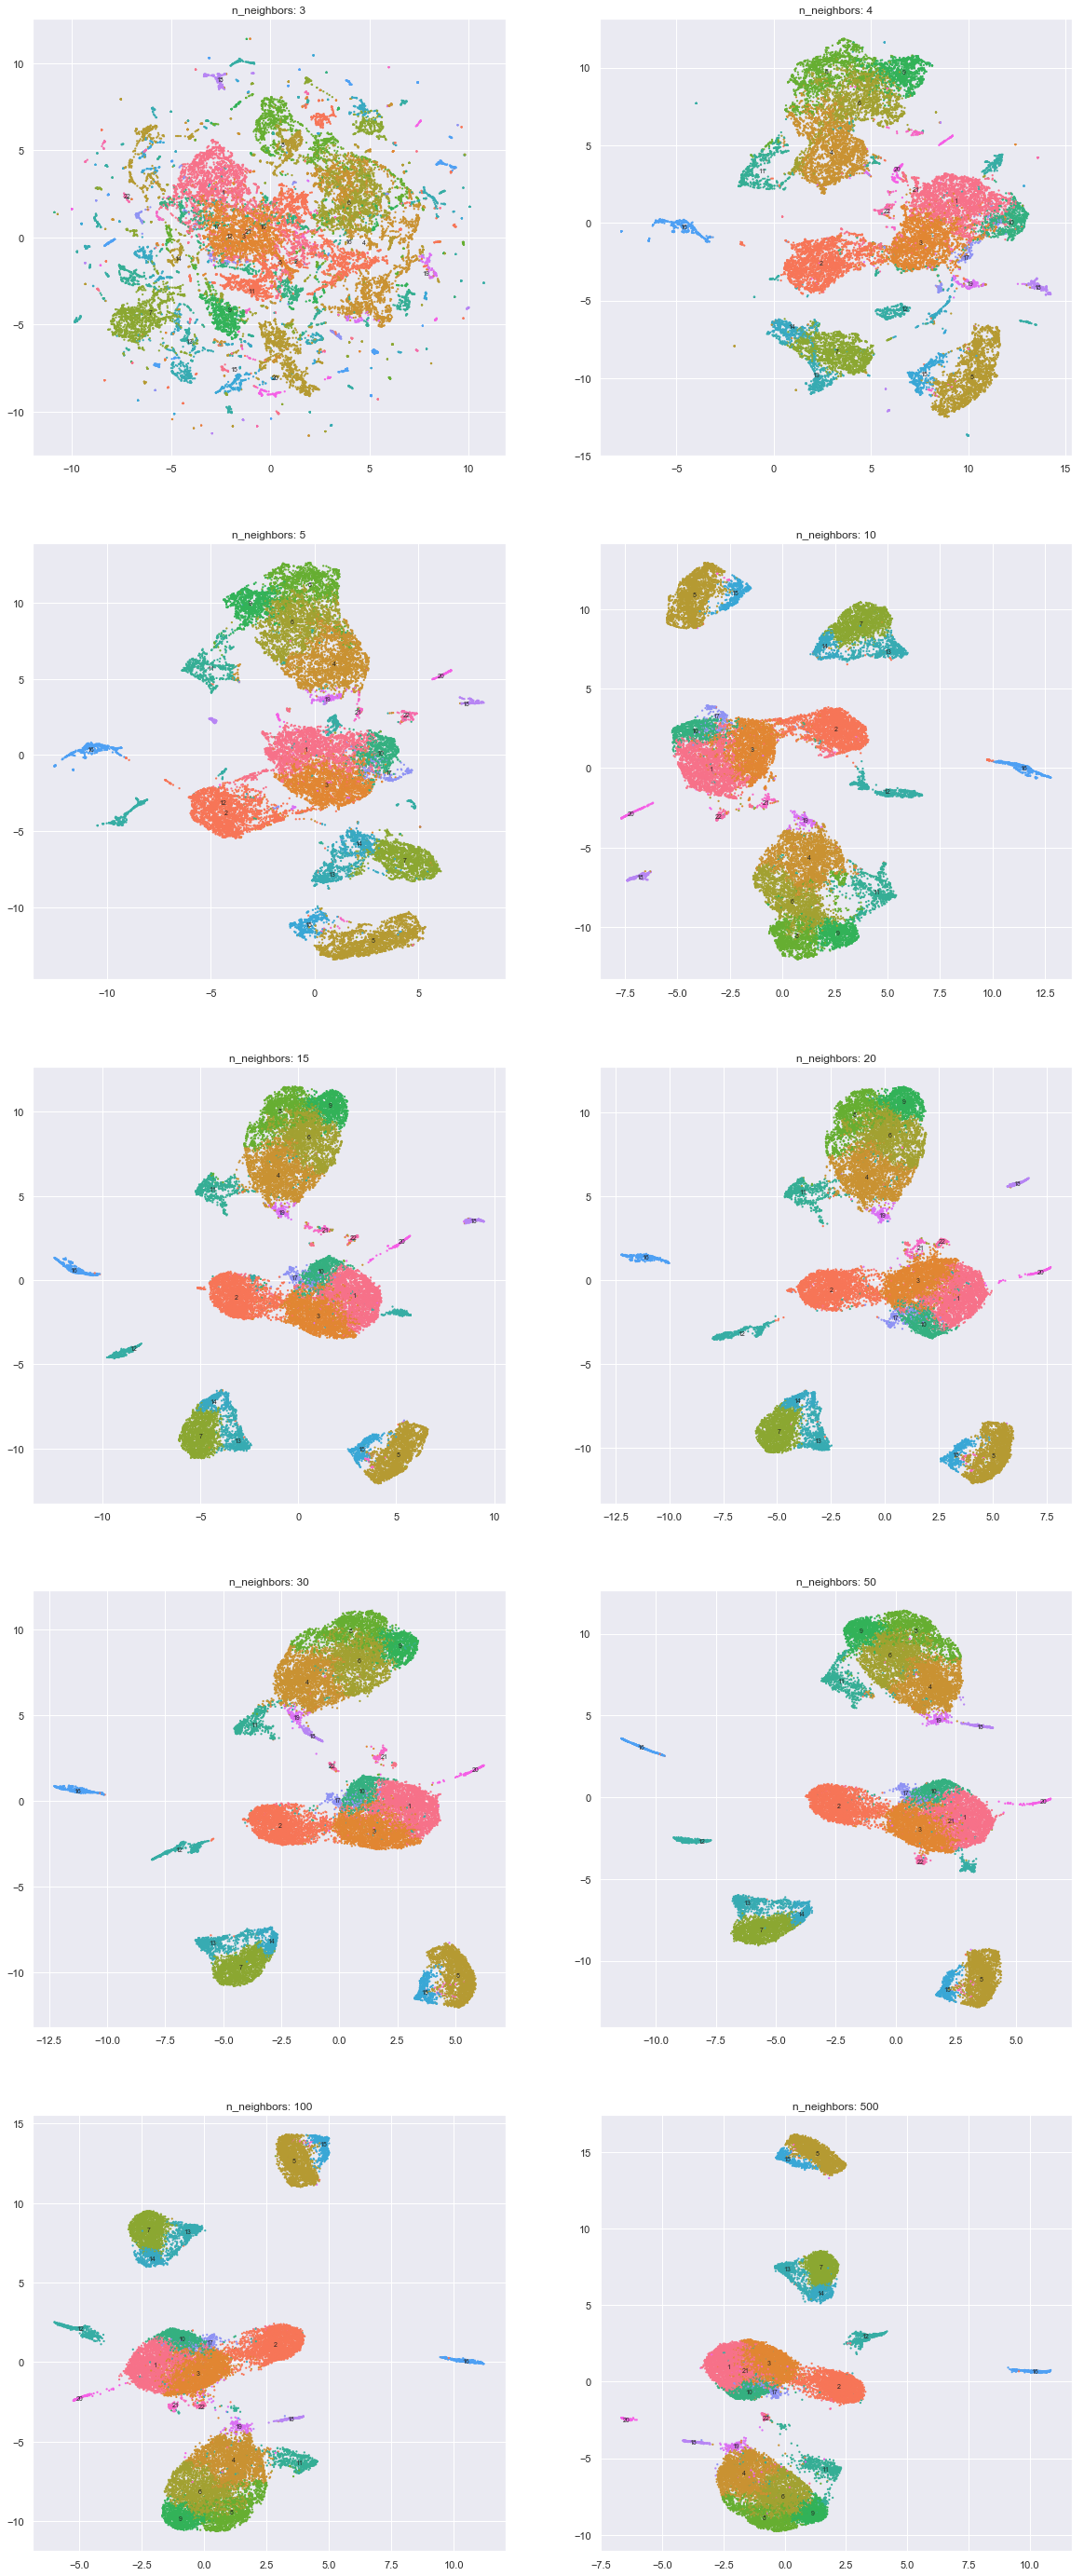

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 50))

for j, i in enumerate([ii for i in axes for ii in i]):
    
    i.scatter(x=embedding_umap_n_neighbors['n_neighbors_' + str(num_neighbors[j]) + '_x'],
              y=embedding_umap_n_neighbors['n_neighbors_' + str(num_neighbors[j]) + '_y'],
              c=embedding_umap_n_neighbors['color'],
              s=20,
              marker='.',
              linewidth=0)

    for ii in sorted(embedding_umap_n_neighbors['cluster'].unique()):
        i.annotate(s=ii,
                   xy=(embedding_umap_n_neighbors.loc[embedding_umap_n_neighbors.cluster == ii,
                                                      'n_neighbors_' + str(num_neighbors[j]) + '_x'].median(),
                       embedding_umap_n_neighbors.loc[embedding_umap_n_neighbors.cluster == ii,
                                                      'n_neighbors_' + str(num_neighbors[j]) + '_y'].median()),
                   fontsize=7,
                   horizontalalignment='center',
                   verticalalignment='center')

    i.set_title('n_neighbors: {}'.format(str(num_neighbors[j])))  

In [21]:
embedding_umap_n_neighbors.head()

cluster  num.umis  num.reads  \
JD126-1-2_TTTCTATATACA.bam        9     18437      23692   
JD126-1-2_CCTAGAAACCAG.bam        9     16103      20274   
JD126-1-2_TCATAGTCTATT.bam        9     15542      20525   
JD126-1-2_ATGACCTTTCCC.bam       13     14783      17798   
JD126-1-2_CATTAGTGATGG.bam       11     13701      16388   

                                                                        color  \
JD126-1-2_TTTCTATATACA.bam  (0.19592059105779686, 0.6981620017487838, 0.34...   
JD126-1-2_CCTAGAAACCAG.bam  (0.19592059105779686, 0.6981620017487838, 0.34...   
JD126-1-2_TCATAGTCTATT.bam  (0.19592059105779686, 0.6981620017487838, 0.34...   
JD126-1-2_ATGACCTTTCCC.bam  (0.21420912437215422, 0.6714963557258681, 0.69...   
JD126-1-2_CATTAGTGATGG.bam  (0.2067117296964458, 0.6829103404254792, 0.582...   

                            n_neighbors_3_x  n_neighbors_3_y  n_neighbors_4_x  \
JD126-1-2_TTTCTATATACA.bam        -0.963118         4.830428         6.757713   
JD126-1-2_CCTAGAAACCAG.bam        -2.256149        -5.290727         7.418665   
JD126-1-2_TCATAGTCTATT.bam        -1.916035        -4.994292         7.647964   
JD126-1-2_ATGACCTTTCCC.bam        -4.310342        -8.109309         2.319135   
JD126-1-2_CATTAGTGATGG.bam        -7.567667        -1.768299        -1.646339   

                            n_neighbors_4_y  n_neighbors_5_x  n_neighbors_5_y  \
JD126-1-2_TTTCTATATACA.bam        10.258513        -2.913926        11.234440   
JD126-1-2_CCTAGAAACCAG.bam        10.569828        -3.910963        10.478025   
JD126-1-2_TCATAGTCTATT.bam         9.298085        -3.696779         9.246532   
JD126-1-2_ATGACCTTTCCC.bam       -10.819665         0.346709        -8.335163   
JD126-1-2_CATTAGTGATGG.bam         2.463917        -6.273907         5.641792   

                            ...  n_neighbors_20_x  n_neighbors_20_y  \
JD126-1-2_TTTCTATATACA.bam  ...          0.098953         11.365155   
JD126-1-2_CCTAGAAACCAG.bam  ...          0.933557         11.450002   
JD126-1-2_TCATAGTCTATT.bam  ...          1.485616         10.799916   
JD126-1-2_ATGACCTTTCCC.bam  ...         -2.920978        -10.086173   
JD126-1-2_CATTAGTGATGG.bam  ...         -4.577157          5.054291   

                            n_neighbors_30_x  n_neighbors_30_y  \
JD126-1-2_TTTCTATATACA.bam          2.668725          9.818213   
JD126-1-2_CCTAGAAACCAG.bam          3.218088          9.455477   
JD126-1-2_TCATAGTCTATT.bam          3.218940          8.697661   
JD126-1-2_ATGACCTTTCCC.bam         -6.042269         -8.384587   
JD126-1-2_CATTAGTGATGG.bam         -4.430724          3.913744   

                            n_neighbors_50_x  n_neighbors_50_y  \
JD126-1-2_TTTCTATATACA.bam         -1.052572         11.009877   
JD126-1-2_CCTAGAAACCAG.bam         -1.764188         10.541816   
JD126-1-2_TCATAGTCTATT.bam         -1.947943         10.104555   
JD126-1-2_ATGACCTTTCCC.bam         -6.716163         -6.229234   
JD126-1-2_CATTAGTGATGG.bam         -3.009222          7.134346   

                            n_neighbors_100_x  n_neighbors_100_y  \
JD126-1-2_TTTCTATATACA.bam          -0.459771         -10.414302   
JD126-1-2_CCTAGAAACCAG.bam          -1.086158         -10.402098   
JD126-1-2_TCATAGTCTATT.bam          -1.419885          -9.901891   
JD126-1-2_ATGACCTTTCCC.bam          -0.248034           8.531635   
JD126-1-2_CATTAGTGATGG.bam           4.473701          -6.289704   

                            n_neighbors_500_x  n_neighbors_500_y  
JD126-1-2_TTTCTATATACA.bam           0.938362          -9.203294  
JD126-1-2_CCTAGAAACCAG.bam           1.550958          -8.904686  
JD126-1-2_TCATAGTCTATT.bam           1.519774          -8.405230  
JD126-1-2_ATGACCTTTCCC.bam          -0.258826           7.592946  
JD126-1-2_CATTAGTGATGG.bam           2.260902          -5.710428  

[5 rows x 24 columns]

In [22]:
if not Path('embedding_umap_n_neighbors.pdf').is_file():
    fig.savefig('embedding_umap_n_neighbors.pdf', transparent=False)

<a id='min_dist'></a>

## min_dist

In [23]:
embedding_umap_min_dist = embedding_umap.copy(deep=True)
embedding_umap_min_dist.head()

cluster  num.umis  num.reads  \
JD126-1-2_TTTCTATATACA.bam        9     18437      23692   
JD126-1-2_CCTAGAAACCAG.bam        9     16103      20274   
JD126-1-2_TCATAGTCTATT.bam        9     15542      20525   
JD126-1-2_ATGACCTTTCCC.bam       13     14783      17798   
JD126-1-2_CATTAGTGATGG.bam       11     13701      16388   

                                                                        color  
JD126-1-2_TTTCTATATACA.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_CCTAGAAACCAG.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_TCATAGTCTATT.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_ATGACCTTTCCC.bam  (0.21420912437215422, 0.6714963557258681, 0.69...  
JD126-1-2_CATTAGTGATGG.bam  (0.2067117296964458, 0.6829103404254792, 0.582...

In [24]:
min_dists=[0.0, 0.05, 0.08, 0.1, 0.25, 0.5, 0.8, 0.99]

In [25]:
for i in min_dists:
    print('Calculating min_dist: {} ... '.format(str(i)),
          end='')
    
    np.random.seed(seed=20190212)
    u = umap.UMAP(n_neighbors=10,
                  min_dist=i,
                  n_components=2,
                  metric='euclidean').fit_transform(mat)
    print('Done!')
    
    embedding_umap_min_dist.loc[:, 'min_dist_' + str(i) + '_x'] = u[:,0]
    embedding_umap_min_dist.loc[:, 'min_dist_' + str(i) + '_y'] = u[:,1]

Calculating min_dist: 0.0 ... Done!
Calculating min_dist: 0.05 ... Done!
Calculating min_dist: 0.08 ... Done!
Calculating min_dist: 0.1 ... Done!
Calculating min_dist: 0.25 ... Done!
Calculating min_dist: 0.5 ... Done!
Calculating min_dist: 0.8 ... Done!
Calculating min_dist: 0.99 ... Done!


In [26]:
embedding_umap_min_dist.shape

(25776, 20)

In [27]:
if not Path('embedding_umap_min_dist.csv').is_file():
    embedding_umap_min_dist.to_csv('embedding_umap_min_dist.csv')

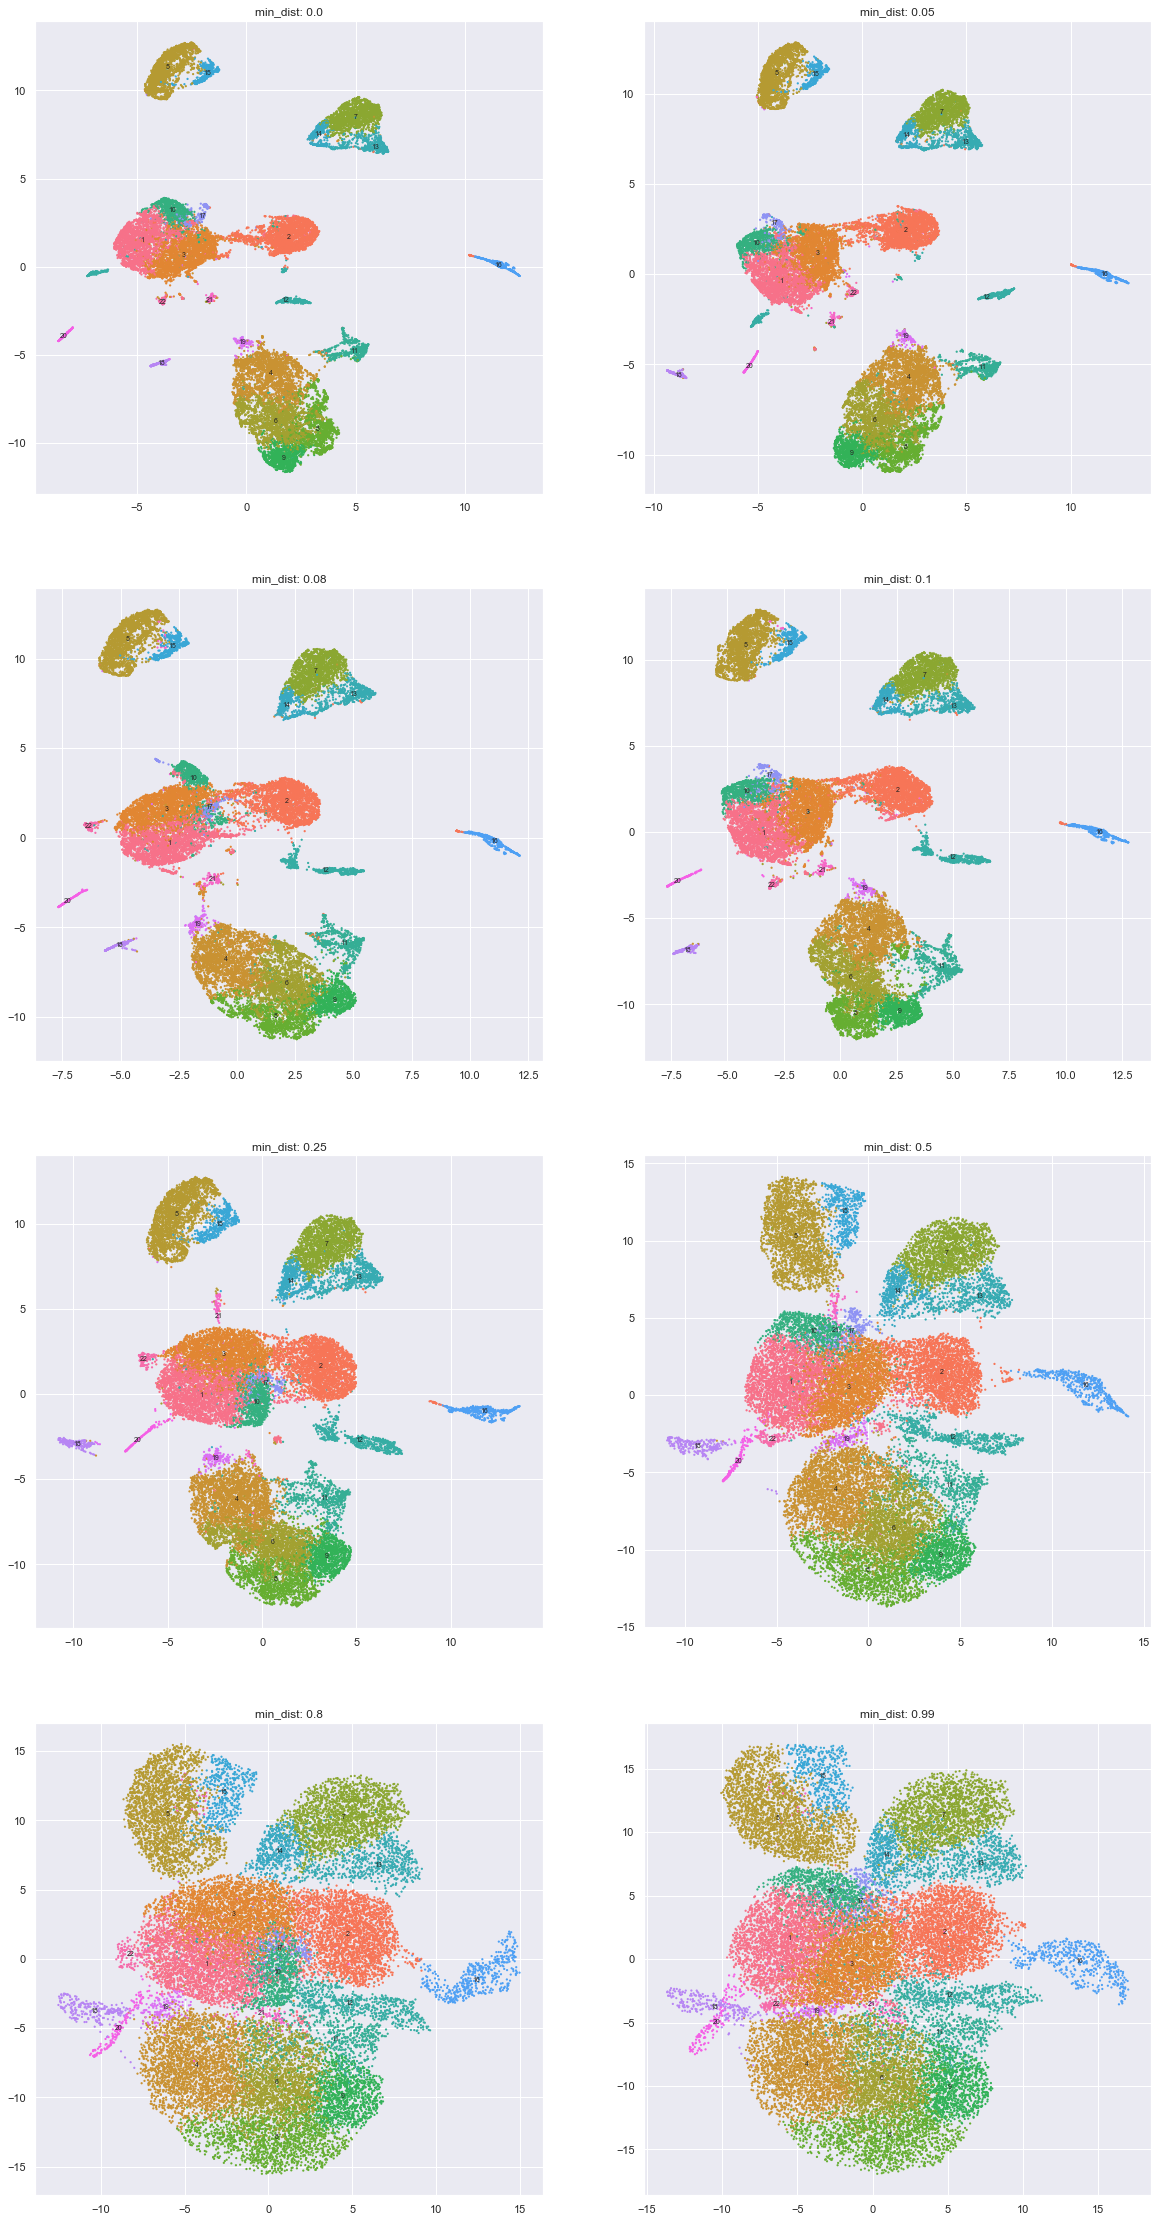

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 40))

for j, i in enumerate([ii for i in axes for ii in i]):
    
    i.scatter(x=embedding_umap_min_dist['min_dist_' + str(min_dists[j]) + '_x'],
              y=embedding_umap_min_dist['min_dist_' + str(min_dists[j]) + '_y'],
              c=embedding_umap_min_dist['color'],
              s=20,
              marker='.',
              linewidth=0)

    for ii in sorted(embedding_umap_min_dist['cluster'].unique()):
        i.annotate(s=ii,
                   xy=(embedding_umap_min_dist.loc[embedding_umap_min_dist.cluster == ii,
                                                   'min_dist_' + str(min_dists[j]) + '_x'].median(),
                       embedding_umap_min_dist.loc[embedding_umap_min_dist.cluster == ii,
                                                   'min_dist_' + str(min_dists[j]) + '_y'].median()),
                   fontsize=7,
                   horizontalalignment='center',
                   verticalalignment='center')

    i.set_title('min_dist: {}'.format(str(min_dists[j])))

In [29]:
if not Path('embedding_umap_min_dist.pdf').is_file():
    fig.savefig('embedding_umap_min_dist.pdf', transparent=False)

<a id='metric'></a>

## metric

In [30]:
embedding_umap_metric = embedding_umap.copy(deep=True)
embedding_umap_metric.head()

cluster  num.umis  num.reads  \
JD126-1-2_TTTCTATATACA.bam        9     18437      23692   
JD126-1-2_CCTAGAAACCAG.bam        9     16103      20274   
JD126-1-2_TCATAGTCTATT.bam        9     15542      20525   
JD126-1-2_ATGACCTTTCCC.bam       13     14783      17798   
JD126-1-2_CATTAGTGATGG.bam       11     13701      16388   

                                                                        color  
JD126-1-2_TTTCTATATACA.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_CCTAGAAACCAG.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_TCATAGTCTATT.bam  (0.19592059105779686, 0.6981620017487838, 0.34...  
JD126-1-2_ATGACCTTTCCC.bam  (0.21420912437215422, 0.6714963557258681, 0.69...  
JD126-1-2_CATTAGTGATGG.bam  (0.2067117296964458, 0.6829103404254792, 0.582...

In [31]:
metrics = ['euclidean',
           'manhattan',
           'chebyshev',
           'minkowski',
           'canberra',
           'braycurtis',
           # 'mahalanobis',
           # 'wminkowski',
           # 'seuclidean',
           'cosine',
           'correlation',
           # 'haversine',
           'hamming',
           'jaccard',
           'dice',
           # 'russelrao',
           'kulsinski',
           'rogerstanimoto',
           ## 'sokalmichener',
           # 'sokalsneath,
           'yule']

In [32]:
for i in metrics:
    print('Calculating metrics: {} ... '.format(str(i)),
          end='')
    
    np.random.seed(seed=20190212)
    u = umap.UMAP(n_neighbors=10,
                  min_dist=0.1,
                  n_components=2,
                  metric=i).fit_transform(mat)
    print('Done!')

    embedding_umap_metric.loc[:, 'metric_' + str(i) + '_x'] = u[:,0]
    embedding_umap_metric.loc[:, 'metric_' + str(i) + '_y'] = u[:,1]

Calculating metrics: euclidean ... Done!
Calculating metrics: manhattan ... Done!
Calculating metrics: chebyshev ... Done!
Calculating metrics: minkowski ... Done!
Calculating metrics: canberra ... Done!
Calculating metrics: braycurtis ... Done!
Calculating metrics: cosine ... Done!
Calculating metrics: correlation ... Done!
Calculating metrics: hamming ... Done!
Calculating metrics: jaccard ... Done!
Calculating metrics: dice ... Done!
Calculating metrics: kulsinski ... Done!
Calculating metrics: rogerstanimoto ... Done!
Calculating metrics: yule ... Done!


In [33]:
if not Path('embedding_umap_metric.csv').is_file():
    embedding_umap_metric.to_csv('embedding_umap_metric.csv')

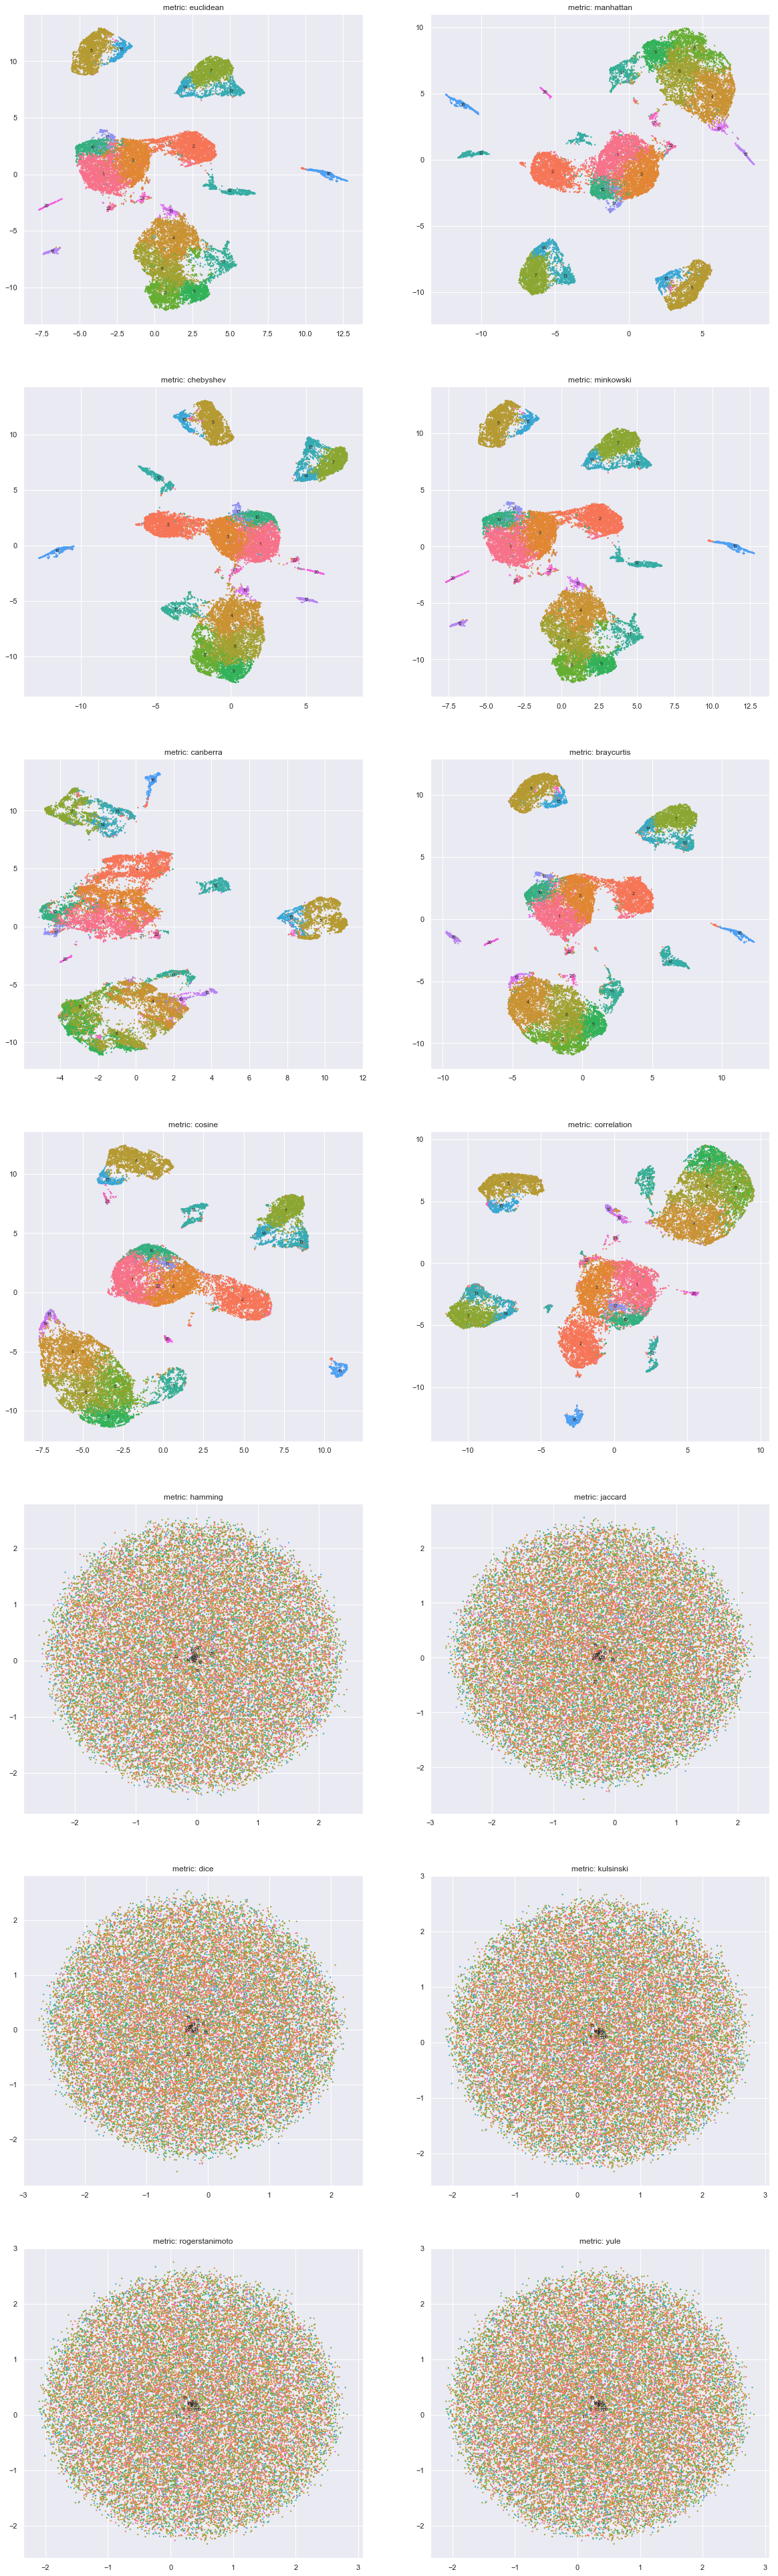

In [34]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 70))

for j, i in enumerate([ii for i in axes for ii in i]):
    
    i.scatter(x=embedding_umap_metric['metric_' + str(metrics[j]) + '_x'],
              y=embedding_umap_metric['metric_' + str(metrics[j]) + '_y'],
              c=embedding_umap_metric['color'],
              s=20,
              marker='.',
              linewidth=0)

    for ii in sorted(embedding_umap_metric['cluster'].unique()):
        i.annotate(s=ii,
                   xy=(embedding_umap_metric.loc[embedding_umap_metric.cluster == ii,
                                                 'metric_' + str(metrics[j]) + '_x'].median(),
                       embedding_umap_metric.loc[embedding_umap_metric.cluster == ii,
                                                 'metric_' + str(metrics[j]) + '_y'].median()),
                   fontsize=7,
                   horizontalalignment='center',
                   verticalalignment='center')

    i.set_title('metric: {}'.format(str(metrics[j])))  

In [35]:
if not Path('embedding_umap_metric.pdf').is_file():
    fig.savefig('embedding_umap_metric.pdf', transparent=False)

<a id='clustering'></a>

# Clustering

In [36]:
np.random.seed(seed=20190212)
embedding_umap_clusterable = umap.UMAP(n_neighbors=3,
                                       min_dist=0.0,
                                       n_components=20).fit_transform(mat)

/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 19 separate connected components using meta-embedding (experimental)
  n_components


In [37]:
embedding_umap_clusterable.shape

(25776, 20)

In [38]:
import hdbscan

In [39]:
clusters_assigned = hdbscan.HDBSCAN(algorithm='best', 
                                    alpha=1.0, 
                                    approx_min_span_tree=True,
                                    gen_min_span_tree=False,
                                    leaf_size=40,
                                    metric='euclidean', 
                                    min_cluster_size=50, 
                                    min_samples=None).fit(embedding_umap_clusterable).labels_

/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/Users/jialei/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


In [40]:
pd.Series(clusters_assigned).value_counts()

 14    9604
 16    7737
 5     2394
 10    2364
 4      602
 15     587
 11     405
-1      388
 8      381
 1      376
 12     189
 7      153
 2      151
 3      119
 13      91
 6       82
 0       79
 9       74
dtype: int64

In [41]:
np.random.seed(seed=20190212)
embedding_umap_visualization = umap.UMAP(n_components=2,
                                         n_neighbors=15,
                                         min_dist=0.1,
                                         metric='euclidean').fit_transform(mat)

In [42]:
embedding_umap_visualization = pd.DataFrame(embedding_umap_visualization,
                                            index=cells_included,
                                            columns=['x', 'y'])
embedding_umap_visualization['cluster'] = clusters_assigned
embedding_umap_visualization.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25776 entries, JD126-1-2_TTTCTATATACA.bam to JD135Y_ATGCCCCGCGTC.bam
Data columns (total 3 columns):
x          25776 non-null float32
y          25776 non-null float32
cluster    25776 non-null int64
dtypes: float32(2), int64(1)
memory usage: 604.1+ KB


Text(0.5, 1.0, 'HDBSCAN clustering')

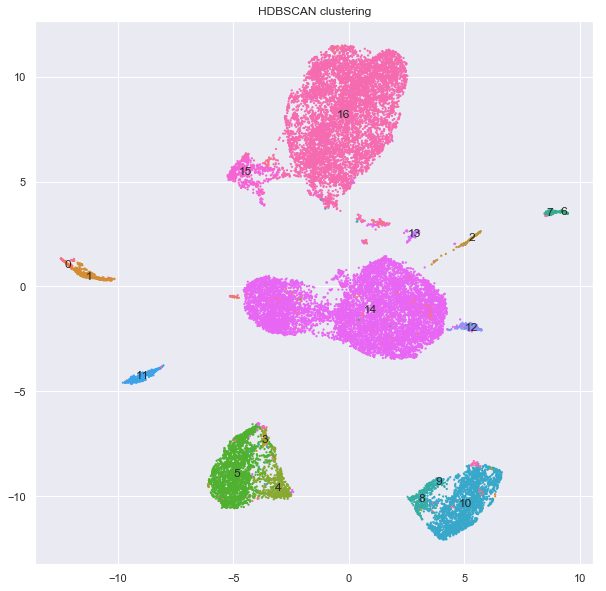

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(x=embedding_umap_visualization.x,
           y=embedding_umap_visualization.y,
           c=embedding_umap_visualization.cluster.map({j - 1 : i 
                                                       for j, i in enumerate(sns.color_palette('husl', 
                                                                             len(np.unique(clusters_assigned))))}),
           s=20,
           marker='.',
           linewidth=0)

for i in [label for label in sorted(embedding_umap_visualization.cluster.unique()) if label != -1]:
    # add cluster labels
    ax.annotate(s=i,
                 xy=(embedding_umap_visualization.loc[embedding_umap_visualization.cluster == i, 'x'].median(),
                     embedding_umap_visualization.loc[embedding_umap_visualization.cluster == i, 'y'].median()),
                 fontsize=12,
                 horizontalalignment='center',
                 verticalalignment='center')
    
ax.set_title('HDBSCAN clustering') 